## CBOW 모델 구현

In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 464 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 465 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 466 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 467 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 468 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 469 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 470 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 471 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 472 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 473 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 474 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 475 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 476 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 477 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 478 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 479 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 480 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 481 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 482 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 483 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 484 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 485 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 486 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 487 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 488 |  반복 1

| 에폭 796 |  반복 1 / 2 | 시간 0[s] | 손실 0.34
| 에폭 797 |  반복 1 / 2 | 시간 0[s] | 손실 0.36
| 에폭 798 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 799 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 800 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 801 |  반복 1 / 2 | 시간 0[s] | 손실 0.25
| 에폭 802 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 803 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 804 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 805 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 806 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 807 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 808 |  반복 1 / 2 | 시간 0[s] | 손실 0.13
| 에폭 809 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 810 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 811 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 812 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 813 |  반복 1 / 2 | 시간 0[s] | 손실 0.22
| 에폭 814 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 815 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 816 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 817 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 818 |  반복 1 / 2 | 시간 0[s] | 손실 0.22
| 에폭 819 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 820 |  반복 1

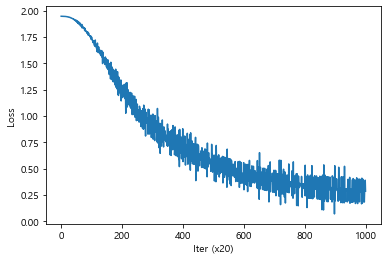

you [-0.87298423 -1.4705726   0.87816626  0.91620654  1.4260027 ]
say [ 1.27045    -0.26945683 -1.2797061  -1.2591997   0.26460654]
goodbye [-1.1877855   0.4084554   1.1882344   1.2062887  -0.27067745]
and [ 0.974831   -1.4465418  -0.9796456  -0.96701366  1.4444    ]
i [-1.1682934   0.4336283   1.1969699   1.1767153  -0.27931675]
hello [-0.8827018 -1.4789038  0.8823658  0.9255868  1.4362605]
. [ 1.1978357  1.4050804 -1.1989111 -1.1730269 -1.40494  ]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])